In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(10, 7)}, style='darkgrid')
sns.set_color_codes()

from scipy.stats import norm

import cv2

import os

import glob
import datetime
import itertools
import random

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv("../input/nih-chest-x-ray-models/1k_data_train.csv")
train_data.index = [x for x in range(train_data.shape[0])]
train_data.head()

,Finding Labels,path_gambar,Atelectasis,Cardiomegaly,Consolidation,Effusion,Hernia,Infiltration,Mass,No Finding,Nodule,Pneumonia,Pneumothorax
0,Atelectasis,../input/data/images_002/images/00003001_000.png,1,0,0,0,0,0,0,0,0,0,0
1,Atelectasis,../input/data/images_003/images/00005348_019.png,1,0,0,0,0,0,0,0,0,0,0
2,Atelectasis,../input/data/images_011/images/00026325_003.png,1,0,0,0,0,0,0,0,0,0,0
3,Atelectasis,../input/data/images_010/images/00022607_009.png,1,0,0,0,0,0,0,0,0,0,0
4,Atelectasis,../input/data/images_009/images/00020900_000.png,1,0,0,0,0,0,0,0,0,0,0


In [3]:
test_data = pd.read_csv("../input/nih-chest-x-ray-models/1k_data_test.csv")
test_data.index = [x for x in range(test_data.shape[0])]
test_data.head()

,Finding Labels,path_gambar,Atelectasis,Cardiomegaly,Consolidation,Effusion,Hernia,Infiltration,Mass,No Finding,Nodule,Pneumonia,Pneumothorax
0,Atelectasis,../input/data/images_002/images/00003001_000.png,1,0,0,0,0,0,0,0,0,0,0
1,Atelectasis,../input/data/images_003/images/00005348_019.png,1,0,0,0,0,0,0,0,0,0,0
2,Atelectasis,../input/data/images_011/images/00026325_003.png,1,0,0,0,0,0,0,0,0,0,0
3,Atelectasis,../input/data/images_010/images/00022607_009.png,1,0,0,0,0,0,0,0,0,0,0
4,Atelectasis,../input/data/images_009/images/00020900_000.png,1,0,0,0,0,0,0,0,0,0,0


In [4]:
for i in range(train_data.shape[0]):
    if train_data["Finding Labels"][i] == "Cardiomegaly":
        train_data.drop(i, inplace=True)
        break

train_data.index = [x for x in range(train_data.shape[0])]

for i in range(train_data.shape[0]):
    if train_data["Finding Labels"][i] == "Consolidation":
        train_data.drop(i, inplace=True)
        break

train_data.index = [x for x in range(train_data.shape[0])]

In [5]:
train_data['Finding Labels'].value_counts()

Atelectasis      90
Cardiomegaly     90
Consolidation    90
Effusion         90
Hernia           90
Infiltration     90
Mass             90
No Finding       90
Nodule           90
Pneumonia        90
Pneumothorax     90
Name: Finding Labels, dtype: int64

In [6]:
test_data['Finding Labels'].value_counts()

Atelectasis      10
Cardiomegaly     10
Consolidation    10
Effusion         10
Hernia           10
Infiltration     10
Mass             10
No Finding       10
Nodule           10
Pneumonia        10
Pneumothorax     10
Name: Finding Labels, dtype: int64

In [7]:
train_data = train_data.sample(frac=1) # shuffle whole dataset
test_data = test_data.sample(frac=1) # shuffle whole dataset

In [8]:
train_data.index = [x for x in range(train_data.shape[0])]
test_data.index = [x for x in range(test_data.shape[0])]

In [9]:
train_data.head()

,Finding Labels,path_gambar,Atelectasis,Cardiomegaly,Consolidation,Effusion,Hernia,Infiltration,Mass,No Finding,Nodule,Pneumonia,Pneumothorax
0,Hernia,../input/data/images_010/images/00021463_001.png,0,0,0,0,1,0,0,0,0,0,0
1,Atelectasis,../input/data/images_005/images/00010535_000.png,1,0,0,0,0,0,0,0,0,0,0
2,Consolidation,../input/data/images_006/images/00013615_012.png,0,0,1,0,0,0,0,0,0,0,0
3,Consolidation,../input/data/images_003/images/00004007_019.png,0,0,1,0,0,0,0,0,0,0,0
4,Nodule,../input/data/images_006/images/00012640_023.png,0,0,0,0,0,0,0,0,1,0,0


In [10]:
test_data.head()

,Finding Labels,path_gambar,Atelectasis,Cardiomegaly,Consolidation,Effusion,Hernia,Infiltration,Mass,No Finding,Nodule,Pneumonia,Pneumothorax
0,Pneumonia,../input/data/images_005/images/00011188_002.png,0,0,0,0,0,0,0,0,0,1,0
1,Nodule,../input/data/images_005/images/00009293_002.png,0,0,0,0,0,0,0,0,1,0,0
2,Cardiomegaly,../input/data/images_003/images/00004746_004.png,0,1,0,0,0,0,0,0,0,0,0
3,Infiltration,../input/data/images_001/images/00001248_007.png,0,0,0,0,0,1,0,0,0,0,0
4,Pneumonia,../input/data/images_002/images/00001582_019.png,0,0,0,0,0,0,0,0,0,1,0


In [11]:
pd.concat([train_data, test_data]).duplicated().sum() # any duplicate values?

108

In [12]:
labels = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Effusion', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pneumonia', 'Pneumothorax']

In [13]:
def sharpening(img):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    image_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
    return image_sharp

In [14]:
train_datagen_aug = ImageDataGenerator(rescale=1/255., preprocessing_function=sharpening)
test_datagen_aug = ImageDataGenerator(rescale=1/255., preprocessing_function=sharpening)

In [15]:
IMG_SHAPE = (224, 224)
BATCH_SIZE = 32

print("Training images:")
train_data_aug = train_datagen_aug.flow_from_dataframe(train_data,
                                             x_col="path_gambar",
                                             y_col=labels,
                                             target_size=IMG_SHAPE,
                                             classes=labels,
                                             color_mode="rgb",
                                             class_mode="raw",
                                             seed=42,
                                             batch_size=BATCH_SIZE)
print("Testing images:")
test_data_aug = test_datagen_aug.flow_from_dataframe(test_data,
                                             x_col="path_gambar",
                                             y_col=labels,
                                             target_size=IMG_SHAPE,
                                             classes=labels,
                                             color_mode="rgb",
                                             class_mode="raw",
                                             shuffle=False,
                                             seed=42,
                                             batch_size=BATCH_SIZE)

Training images:
Found 990 validated image filenames.
Testing images:
Found 110 validated image filenames.


In [16]:
EPOCHS = 10

###  VGG19

In [17]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# 1. Create model
input_shape=(224, 224, 3)
img_input = Input(shape=input_shape)

base_model = VGG19(include_top=False, input_tensor=img_input, input_shape=input_shape, 
                         pooling="avg", weights='imagenet')
x = base_model.output
predictions = Dense(len(labels), activation="sigmoid", name="output")(x)
model = Model(inputs=img_input, outputs=predictions)


# 2. Compile the model
optimizer = Adam(lr=0.0005)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])

earlystopper = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, verbose=0, mode='min',
    restore_best_weights=True
)

# 3. Fit the model
history = model.fit(train_data_aug,
                   epochs=EPOCHS,
                   steps_per_epoch=len(train_data_aug),
                   validation_data=test_data_aug,
                   validation_steps=len(test_data_aug),
                   callbacks=[earlystopper])

80150528/80134624 [==============================] - 3s 0us/step
Epoch 1/10
31/31 [==============================] - 42s 987ms/step - loss: 0.3960 - binary_accuracy: 0.8732 - auc: 0.4914 - val_loss: 0.3059 - val_binary_accuracy: 0.9091 - val_auc: 0.5072
Epoch 2/10
31/31 [==============================] - 18s 589ms/step - loss: 0.3064 - binary_accuracy: 0.9091 - auc: 0.4945 - val_loss: 0.3076 - val_binary_accuracy: 0.9091 - val_auc: 0.5008


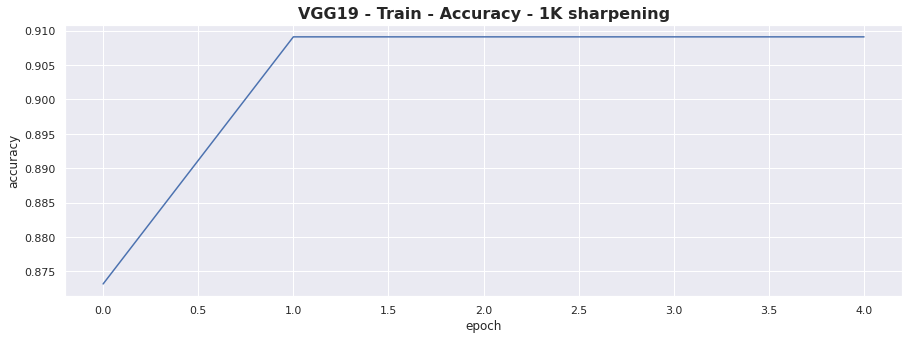

In [18]:
plt.figure(figsize=(15,5))

plt.plot(history.history['binary_accuracy'], linestyle='-')

plt.title('VGG19 - Train - Accuracy - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

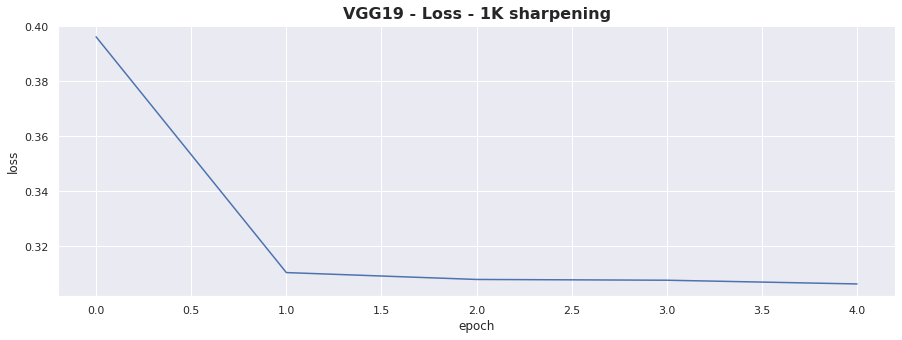

In [19]:
plt.figure(figsize=(15,5))

plt.plot(history.history['loss'], linestyle='-')

plt.title('VGG19 - Loss - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

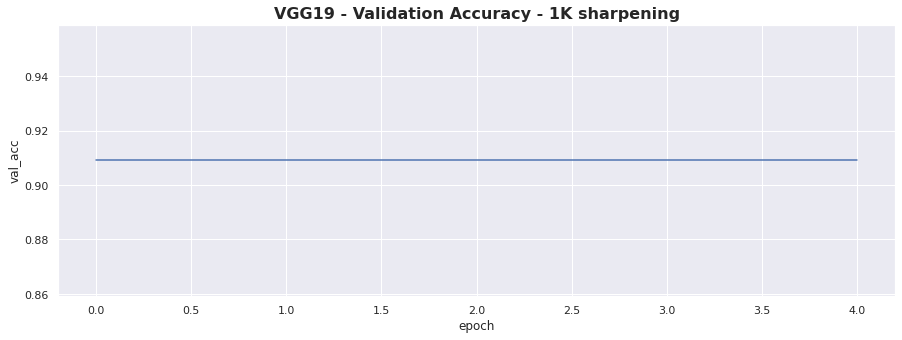

In [20]:
plt.figure(figsize=(15,5))

plt.plot(history.history['val_binary_accuracy'], linestyle='-')

plt.title('VGG19 - Validation Accuracy - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('val_acc')
plt.xlabel('epoch')

plt.show()

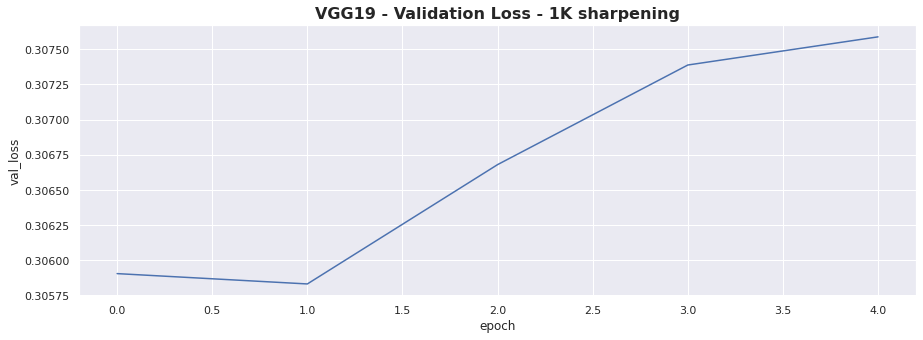

In [21]:
plt.figure(figsize=(15,5))

plt.plot(history.history['val_loss'], linestyle='-')

plt.title('VGG19 - Validation Loss - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('val_loss')
plt.xlabel('epoch')

plt.show()

In [22]:
# Save the model
model.save('vgg19_1K.h5')

### NasNet-Mobile

In [23]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications.nasnet import NASNetMobile
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# 1. Create model
input_shape=(224, 224, 3)
img_input = Input(shape=input_shape)

base_model = NASNetMobile(include_top=False, input_tensor=img_input, input_shape=input_shape, 
                         pooling="avg", weights='imagenet')
x = base_model.output
predictions = Dense(len(labels), activation="sigmoid", name="output")(x)
model = Model(inputs=img_input, outputs=predictions)

# 2. Compile the model
optimizer = Adam(lr=0.0005)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])

earlystopper = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, verbose=0, mode='min',
    restore_best_weights=True
)

# 3. Fit the model
history = model.fit(train_data_aug,
                   epochs=EPOCHS,
                   steps_per_epoch=len(train_data_aug),
                   validation_data=test_data_aug,
                   validation_steps=len(test_data_aug),
                   callbacks=[earlystopper])

20004864/19993432 [==============================] - 1s 0us/step
Epoch 1/10
31/31 [==============================] - 46s 742ms/step - loss: 0.3399 - binary_accuracy: 0.8871 - auc_1: 0.5508 - val_loss: 0.4264 - val_binary_accuracy: 0.8405 - val_auc_1: 0.5339
Epoch 2/10
31/31 [==============================] - 19s 619ms/step - loss: 0.2510 - binary_accuracy: 0.9115 - auc_1: 0.8027 - val_loss: 0.3646 - val_binary_accuracy: 0.8802 - val_auc_1: 0.5773
Epoch 3/10
31/31 [==============================] - 19s 602ms/step - loss: 0.1759 - binary_accuracy: 0.9358 - auc_1: 0.9236 - val_loss: 0.3339 - val_binary_accuracy: 0.8926 - val_auc_1: 0.6001
Epoch 4/10
31/31 [==============================] - 19s 599ms/step - loss: 0.0900 - binary_accuracy: 0.9696 - auc_1: 0.9849 - val_loss: 0.3519 - val_binary_accuracy: 0.8736 - val_auc_1: 0.5993
Epoch 5/10
13/31 [===========>..................] - ETA: 10s - loss: 0.0397 - binary_accuracy: 0.9882 - auc_1: 0.9985Traceback (most recent call last):
  File "/op

TypeError: object of type 'NoneType' has no len()

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(history.history['binary_accuracy'], linestyle='-')

plt.title('NASNet - Train - Accuracy - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(history.history['loss'], linestyle='-')

plt.title('NASNet - Loss - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(history.history['val_binary_accuracy'], linestyle='-')

plt.title('NASNet - Validation Accuracy - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('val_acc')
plt.xlabel('epoch')

plt.show()

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(history.history['val_loss'], linestyle='-')

plt.title('NASNet - Validation Loss - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('val_loss')
plt.xlabel('epoch')

plt.show()

In [ ]:
# Save the model
model.save('nasnet_1K.h5')

### DenseNet121

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# 1. Create model
input_shape=(224, 224, 3)
img_input = Input(shape=input_shape)

base_model = DenseNet121(include_top=False, input_tensor=img_input, input_shape=input_shape, 
                         pooling="avg", weights='imagenet')
x = base_model.output
predictions = Dense(len(labels), activation="sigmoid", name="output")(x)
model = Model(inputs=img_input, outputs=predictions)

# 2. Compile the model
optimizer = Adam(lr=0.0005)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=[tf.keras.metrics.BinaryAccuracy(), 
                                                                        tf.keras.metrics.AUC()])

earlystopper = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=2, verbose=0, mode='min',
    restore_best_weights=True
)

# 3. Fit the model
history = model.fit(train_data_aug,
                   epochs=EPOCHS,
                   steps_per_epoch=len(train_data_aug),
                   validation_data=test_data_aug,
                   validation_steps=len(test_data_aug),
                   callbacks=[earlystopper])

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(history.history['binary_accuracy'], linestyle='-')

plt.title('DenseNet121 - Train - Accuracy - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(history.history['loss'], linestyle='-')

plt.title('DenseNet121 - Loss - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(history.history['val_binary_accuracy'], linestyle='-')

plt.title('DenseNet121 - Validation Accuracy - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('val_acc')
plt.xlabel('epoch')

plt.show()

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(history.history['val_loss'], linestyle='-')

plt.title('DenseNet121 - Validation Loss - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('val_loss')
plt.xlabel('epoch')

plt.show()

In [ ]:
# Save the model
model.save('ds121_1K.h5')

### MobileNetV2

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# 1. Create model
input_shape=(224, 224, 3)
img_input = Input(shape=input_shape)

base_model = MobileNetV2(include_top=False, input_tensor=img_input, input_shape=input_shape, 
                         pooling="avg", weights='imagenet')
x = base_model.output
predictions = Dense(len(labels), activation="sigmoid", name="output")(x)
model = Model(inputs=img_input, outputs=predictions)

# 2. Compile the model
optimizer = Adam(lr=0.0005)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])

earlystopper = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, verbose=0, mode='min',
    restore_best_weights=True
)

# 3. Fit the model
history = model.fit(train_data_aug,
                   epochs=EPOCHS,
                   steps_per_epoch=len(train_data_aug),
                   validation_data=test_data_aug,
                   validation_steps=len(test_data_aug),
                   callbacks=[earlystopper])

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(history.history['binary_accuracy'], linestyle='-')

plt.title('MobileNetV2 - Train - Accuracy - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(history.history['loss'], linestyle='-')

plt.title('MobileNetV2 - Loss - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(history.history['val_binary_accuracy'], linestyle='-')

plt.title('MobileNetV2 - Validation Accuracy - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('val_acc')
plt.xlabel('epoch')

plt.show()

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(history.history['val_loss'], linestyle='-')

plt.title('MobileNetV2 - Validation Loss - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('val_loss')
plt.xlabel('epoch')

plt.show()

In [ ]:
# Save the model
model.save('mobile_1K.h5')

### ResNet50V2

In [ ]:
train_datagen_aug = ImageDataGenerator(preprocessing_function=sharpening)
test_datagen_aug = ImageDataGenerator(preprocessing_function=sharpening)

In [ ]:
IMG_SHAPE = (224, 224)
BATCH_SIZE = 32

print("Training images:")
train_data_aug = train_datagen_aug.flow_from_dataframe(train_data,
                                             x_col="path_gambar",
                                             y_col=labels,
                                             target_size=IMG_SHAPE,
                                             classes=labels,
                                             color_mode="rgb",
                                             class_mode="raw",
                                             seed=42,
                                             batch_size=BATCH_SIZE)
print("Testing images:")
test_data_aug = test_datagen_aug.flow_from_dataframe(test_data,
                                             x_col="path_gambar",
                                             y_col=labels,
                                             target_size=IMG_SHAPE,
                                             classes=labels,
                                             color_mode="rgb",
                                             class_mode="raw",
                                             shuffle=False,
                                             seed=42,
                                             batch_size=BATCH_SIZE)

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# 1. Create model
input_shape=(224, 224, 3)
img_input = Input(shape=input_shape)

base_model = ResNet50V2(include_top=False, input_tensor=img_input, input_shape=input_shape, 
                         pooling="avg", weights='imagenet')
x = base_model.output
predictions = Dense(len(labels), activation="sigmoid", name="output")(x)
model = Model(inputs=img_input, outputs=predictions)

# 2. Compile the model
optimizer = Adam(lr=0.0005)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])

earlystopper = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, verbose=0, mode='min',
    restore_best_weights=True
)

# 3. Fit the model
history = model.fit(train_data_aug,
                   epochs=EPOCHS,
                   steps_per_epoch=len(train_data_aug),
                   validation_data=test_data_aug,
                   validation_steps=len(test_data_aug),
                   callbacks=[earlystopper])

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(history.history['binary_accuracy'], linestyle='-')

plt.title('ResNet50V2 - Train - Accuracy - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(history.history['loss'], linestyle='-')

plt.title('ResNet50V2 - Loss - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(history.history['val_binary_accuracy'], linestyle='-')

plt.title('ResNet50V2 - Validation Accuracy - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('val_acc')
plt.xlabel('epoch')

plt.show()

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(history.history['val_loss'], linestyle='-')

plt.title('ResNet50V2 - Validation Loss - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('val_loss')
plt.xlabel('epoch')

plt.show()

In [ ]:
# Save the model
model.save('resnet50_1K.h5')

### EfficientNetB0

In [ ]:
train_datagen_aug = ImageDataGenerator(preprocessing_function=sharpening)
test_datagen_aug = ImageDataGenerator(preprocessing_function=sharpening)

In [ ]:
IMG_SHAPE = (224, 224)
BATCH_SIZE = 32

print("Training images:")
train_data_aug = train_datagen_aug.flow_from_dataframe(train_data,
                                             x_col="path_gambar",
                                             y_col=labels,
                                             target_size=IMG_SHAPE,
                                             classes=labels,
                                             color_mode="rgb",
                                             class_mode="raw",
                                             seed=42,
                                             batch_size=BATCH_SIZE)
print("Testing images:")
test_data_aug = test_datagen_aug.flow_from_dataframe(test_data,
                                             x_col="path_gambar",
                                             y_col=labels,
                                             target_size=IMG_SHAPE,
                                             classes=labels,
                                             color_mode="rgb",
                                             class_mode="raw",
                                             shuffle=False,
                                             seed=42,
                                             batch_size=BATCH_SIZE)

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications.efficientnet import EfficientNetB0 
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# 1. Create model
input_shape=(224, 224, 3)
img_input = Input(shape=input_shape)

base_model = EfficientNetB0(include_top=False, input_tensor=img_input, input_shape=input_shape, 
                         pooling="avg", weights='imagenet')
x = base_model.output
predictions = Dense(len(labels), activation="sigmoid", name="output")(x)
model = Model(inputs=img_input, outputs=predictions)

# 2. Compile the model
optimizer = Adam(lr=0.0005)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])

earlystopper = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, verbose=0, mode='min',
    restore_best_weights=True
)

# 3. Fit the model
history = model.fit(train_data_aug,
                   epochs=EPOCHS,
                   steps_per_epoch=len(train_data_aug),
                   validation_data=test_data_aug,
                   validation_steps=len(test_data_aug),
                   callbacks=[earlystopper])

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(history.history['binary_accuracy'], linestyle='-')

plt.title('EfficientNetB0 - Train - Accuracy - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(history.history['loss'], linestyle='-')

plt.title('EfficientNetB0 - Loss - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(history.history['val_binary_accuracy'], linestyle='-')

plt.title('EfficientNetB0 - Validation Accuracy - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('val_acc')
plt.xlabel('epoch')

plt.show()

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(history.history['val_loss'], linestyle='-')

plt.title('EfficientNetB0 - Validation Loss - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('val_loss')
plt.xlabel('epoch')

plt.show()

In [ ]:
# Save the model
model.save('effb0_1K.h5')

### InceptionV3

In [ ]:
train_datagen_aug = ImageDataGenerator(rescale=1/255., preprocessing_function=sharpening)
test_datagen_aug = ImageDataGenerator(rescale=1/255., preprocessing_function=sharpening)

In [ ]:
IMG_SHAPE = (299, 299)
BATCH_SIZE = 32

print("Training images:")
train_data_aug = train_datagen_aug.flow_from_dataframe(train_data,
                                             x_col="path_gambar",
                                             y_col=labels,
                                             target_size=IMG_SHAPE,
                                             classes=labels,
                                             color_mode="rgb",
                                             class_mode="raw",
                                             seed=42,
                                             batch_size=BATCH_SIZE)
print("Testing images:")
test_data_aug = test_datagen_aug.flow_from_dataframe(test_data,
                                             x_col="path_gambar",
                                             y_col=labels,
                                             target_size=IMG_SHAPE,
                                             classes=labels,
                                             color_mode="rgb",
                                             class_mode="raw",
                                             shuffle=False,
                                             seed=42,
                                             batch_size=BATCH_SIZE)

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# 1. Create model
input_shape=(299, 299, 3)
img_input = Input(shape=input_shape)

base_model = InceptionV3(include_top=False, input_tensor=img_input, input_shape=input_shape, 
                         pooling="avg", weights='imagenet')
x = base_model.output
predictions = Dense(len(labels), activation="sigmoid", name="output")(x)
model = Model(inputs=img_input, outputs=predictions)


# 2. Compile the model
optimizer = Adam(lr=0.0005)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=[tf.keras.metrics.BinaryAccuracy(), 
                                                                        tf.keras.metrics.AUC()])

earlystopper = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, verbose=0, mode='min',
    restore_best_weights=True
)

# 3. Fit the model
history = model.fit(train_data_aug,
                   epochs=EPOCHS,
                   steps_per_epoch=len(train_data_aug),
                   validation_data=test_data_aug,
                   validation_steps=len(test_data_aug),
                   callbacks=[earlystopper])

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(history.history['binary_accuracy'], linestyle='-')

plt.title('InceptionV3 - Train - Accuracy - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(history.history['loss'], linestyle='-')

plt.title('InceptionV3 - Loss - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(history.history['val_binary_accuracy'], linestyle='-')

plt.title('InceptionV3 - Validation Accuracy - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('val_acc')
plt.xlabel('epoch')

plt.show()

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(history.history['val_loss'], linestyle='-')

plt.title('InceptionV3 - Validation Loss - 1K sharpening', fontweight='bold', fontsize=16)
plt.ylabel('val_loss')
plt.xlabel('epoch')

plt.show()

In [ ]:
model.save("iv3_1K.h5")

## Load and predict for sharpening

In [ ]:
test_datagen_aug = ImageDataGenerator(rescale=1/255., preprocessing_function=sharpening)

IMG_SHAPE = (224, 224)
BATCH_SIZE = 32

print("Testing images:")
test_data_aug = test_datagen_aug.flow_from_dataframe(test_data,
                                             x_col="path_gambar",
                                             y_col=labels,
                                             target_size=IMG_SHAPE,
                                             classes=labels,
                                             color_mode="rgb",
                                             class_mode="raw",
                                             shuffle=False,
                                             seed=42,
                                             batch_size=BATCH_SIZE)

In [ ]:
# Save predictions
def save_to_npy(filename, predictions):
    with open(filename, 'wb') as f:
        np.save(f, predictions)

# Load predictions
def load_saved_preds(filename):
    with open(filename, 'rb') as f:
        a = np.load(f)
    return a

In [ ]:
def load_and_predict(test_data_aug, path, save_file_name):
    model = tf.keras.models.load_model(path)
    preds = model.predict(test_data_aug, steps=len(test_data_aug), verbose=1)
    save_to_npy(save_file_name, preds)

In [ ]:
# load_and_predict(test_data_aug, "../input/nih-chest-x-ray-models/vgg19_1K.h5", "vgg19_1K_npy.npy")
# load_and_predict(test_data_aug, "../input/nih-chest-x-ray-models/ds121_1K.h5", "ds121_1K_npy.npy")
# load_and_predict(test_data_aug, "../input/nih-chest-x-ray-models/nasnet_1K.h5", "nasnet_1K_npy.npy")
# load_and_predict(test_data_aug, "../input/nih-chest-x-ray-models/mobile_1K.h5", "mobile_1K_npy.npy")

load_and_predict(test_data_aug, "vgg19_1K.h5", "vgg19_1K_npy.npy")
load_and_predict(test_data_aug, "ds121_1K.h5", "ds121_1K_npy.npy")
load_and_predict(test_data_aug, "nasnet_1K.h5", "nasnet_1K_npy.npy")
load_and_predict(test_data_aug, "mobile_1K.h5", "mobile_1K_npy.npy")

In [ ]:
test_datagen_aug = ImageDataGenerator(rescale=1/255., preprocessing_function=sharpening)

IMG_SHAPE = (299, 299)
BATCH_SIZE = 32

print("Testing images:")
test_data_aug = test_datagen_aug.flow_from_dataframe(test_data,
                                             x_col="path_gambar",
                                             y_col=labels,
                                             target_size=IMG_SHAPE,
                                             classes=labels,
                                             color_mode="rgb",
                                             class_mode="raw",
                                             shuffle=False,
                                             seed=42,
                                             batch_size=BATCH_SIZE)

In [ ]:
# load_and_predict(test_data_aug, "../input/nih-chest-x-ray-models/iv3_1K.h5", "iv3_1K_npy.npy")
load_and_predict(test_data_aug, "iv3_1K.h5", "iv3_1K_npy.npy")

In [ ]:
test_datagen_aug = ImageDataGenerator(preprocessing_function=sharpening)

IMG_SHAPE = (224, 224)
BATCH_SIZE = 32

print("Testing images:")
test_data_aug = test_datagen_aug.flow_from_dataframe(test_data,
                                             x_col="path_gambar",
                                             y_col=labels,
                                             target_size=IMG_SHAPE,
                                             classes=labels,
                                             color_mode="rgb",
                                             class_mode="raw",
                                             shuffle=False,
                                             seed=42,
                                             batch_size=BATCH_SIZE)

In [ ]:
# load_and_predict(test_data_aug, "../input/nih-chest-x-ray-models/effb0_1K.h5", "effb0_1K_npy.npy")
# load_and_predict(test_data_aug, "../input/nih-chest-x-ray-models/resnet50_1K.h5", "resnet50_1K_npy.npy")

load_and_predict(test_data_aug, "effb0_1K.h5", "effb0_1K_npy.npy")
load_and_predict(test_data_aug, "resnet50_1K.h5", "resnet50_1K_npy.npy")

### Load predictions

#### Show accuracy, precision, recall, f1

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
BATCH_SIZE = 32
IMG_SHAPE = (224, 224)

test_datagen_aug = ImageDataGenerator(rescale=1/255., preprocessing_function=sharpening)

print("Testing images:")
test_data_aug = test_datagen_aug.flow_from_dataframe(test_data,
                                             x_col="path_gambar",
                                             y_col=labels,
                                             target_size=IMG_SHAPE,
                                             classes=labels,
                                             color_mode="rgb",
                                             class_mode="raw",
                                             shuffle=False,
                                             seed=42,
                                             batch_size=BATCH_SIZE)

In [ ]:
vgg19_pred_sharpening = load_saved_preds("vgg19_1K_npy.npy")
ds_121_pred_sharpening = load_saved_preds("ds121_1K_npy.npy")
nasnet_pred_sharpening = load_saved_preds("nasnet_1K_npy.npy")
mobile_v2_pred_sharpening = load_saved_preds("mobile_1K_npy.npy")
effb0_pred_sharpening = load_saved_preds("effb0_1K_npy.npy")
res50v2_pred_sharpening = load_saved_preds("resnet50_1K_npy.npy")
inceptionv3_pred_sharpening = load_saved_preds("iv3_1K_npy.npy")

# vgg19_pred_sharpening = load_saved_preds("vgg19_1K_npy.npy")
# ds_121_pred_sharpening = load_saved_preds("ds121_1K_npy.npy")
# nasnet_pred_sharpening = load_saved_preds("nasnet_1K_npy.npy")
# mobile_v2_pred_sharpening = load_saved_preds("mobile_1K_npy.npy")
# effb0_pred_sharpening = load_saved_preds("effb0_1K_npy.npy")
# res50v2_pred_sharpening = load_saved_preds("resnet50_1K_npy.npy")
# inceptionv3_pred_sharpening = load_saved_preds("iv3_1K_npy.npy")

##### InceptionV3

In [ ]:
iv3_cr = classification_report(test_data_aug.labels.argmax(axis=1), inceptionv3_pred_sharpening.argmax(axis=1), output_dict=True)

iv3_cr = pd.DataFrame(iv3_cr)
iv3_cr.columns = [*labels, "accuracy", "macro avg", "weighted avg"]
iv3_cr

In [ ]:
iv3_cr.drop(["accuracy", "macro avg", "weighted avg"], axis=1, inplace=True)

In [ ]:
iv3_cr = iv3_cr.T

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=round(iv3_cr['precision'] * 100), x=iv3_cr.index, color="brown");
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

plt.title("InceptionV3 - Precision Score (sharpening) - 1K images", fontsize=16, fontweight="bold");

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=round(iv3_cr['recall'] * 100), x=iv3_cr.index, color="brown");
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

plt.title("InceptionV3 - Recall Score (sharpening) (1K)", fontsize=16, fontweight="bold");

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=round(iv3_cr['f1-score'] * 100), x=iv3_cr.index, color="brown");
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

plt.title("InceptionV3 - F1 Score (sharpening) - 1K images", fontsize=16, fontweight="bold");

##### ResNet50V2

In [ ]:
r50_cr = classification_report(test_data_aug.labels.argmax(axis=1), res50v2_pred_sharpening.argmax(axis=1), output_dict=True)

r50_cr = pd.DataFrame(r50_cr)
r50_cr.columns = [*labels, "accuracy", "macro avg", "weighted avg"]
r50_cr

In [ ]:
r50_cr.drop(["accuracy", "macro avg", "weighted avg"], axis=1, inplace=True)

In [ ]:
r50_cr = r50_cr.T

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=round(r50_cr['precision'] * 100), x=r50_cr.index, color="brown");
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

plt.title("ResNet50V2 - Precision Score (sharpening) - 1K images", fontsize=16, fontweight="bold");

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=round(r50_cr['recall'] * 100), x=r50_cr.index, color="brown");
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

plt.title("ResNet50V2 - Recall Score (sharpening) (1K)", fontsize=16, fontweight="bold");

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=round(r50_cr['f1-score'] * 100), x=r50_cr.index, color="brown");
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

plt.title("ResNet50V2 - F1 Score (sharpening) - 1K images", fontsize=16, fontweight="bold");

##### EfficientNetB0

In [ ]:
effb0_cr = classification_report(test_data_aug.labels.argmax(axis=1), effb0_pred_sharpening.argmax(axis=1), output_dict=True)

effb0_cr = pd.DataFrame(effb0_cr)
effb0_cr.columns = [*labels, "accuracy", "macro avg", "weighted avg"]
effb0_cr

In [ ]:
effb0_cr.drop(["accuracy", "macro avg", "weighted avg"], axis=1, inplace=True)

In [ ]:
effb0_cr = effb0_cr.T

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=round(effb0_cr['precision'] * 100), x=effb0_cr.index, color="brown");
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

plt.title("EfficientNetB0 - Precision Score (sharpening) - 1K images", fontsize=16, fontweight="bold");

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=round(effb0_cr['recall'] * 100), x=effb0_cr.index, color="brown");
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

plt.title("EfficientNetB0 - Recall Score (sharpening) (1K)", fontsize=16, fontweight="bold");

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=round(effb0_cr['f1-score'] * 100), x=effb0_cr.index, color="brown");
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

plt.title("EfficientNetB0 - F1 Score (sharpening) - 1K images", fontsize=16, fontweight="bold");

##### MobileNetV2

In [ ]:
mb_cr = classification_report(test_data_aug.labels.argmax(axis=1), mobile_v2_pred_sharpening.argmax(axis=1), output_dict=True)

mb_cr = pd.DataFrame(mb_cr)
mb_cr.columns = [*labels, "accuracy", "macro avg", "weighted avg"]
mb_cr

In [ ]:
mb_cr.drop(["accuracy", "macro avg", "weighted avg"], axis=1, inplace=True)

In [ ]:
mb_cr = mb_cr.T

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=round(mb_cr['precision'] * 100), x=mb_cr.index, color="brown");
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

plt.title("MobileNetV2 - Precision Score (sharpening) - 1K images", fontsize=16, fontweight="bold");

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=round(mb_cr['recall'] * 100), x=mb_cr.index, color="brown");
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

plt.title("MobileNetV2 - Recall Score (sharpening) (1K)", fontsize=16, fontweight="bold");

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=round(mb_cr['f1-score'] * 100), x=mb_cr.index, color="brown");
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

plt.title("MobileNetV2 - F1 Score (sharpening) - 1K images", fontsize=16, fontweight="bold");

##### NasNet Mobile

In [ ]:
nas_cr = classification_report(test_data_aug.labels.argmax(axis=1), nasnet_pred_sharpening.argmax(axis=1), output_dict=True)

nas_cr = pd.DataFrame(nas_cr)
nas_cr.columns = [*labels, "accuracy", "macro avg", "weighted avg"]
nas_cr

In [ ]:
nas_cr.drop(["accuracy", "macro avg", "weighted avg"], axis=1, inplace=True)

In [ ]:
nas_cr = nas_cr.T

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=round(nas_cr['precision'] * 100), x=nas_cr.index, color="brown");
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

plt.title("NasNet - Precision Score (sharpening) - 1K images", fontsize=16, fontweight="bold");

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=round(nas_cr['recall'] * 100), x=nas_cr.index, color="brown");
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

plt.title("NasNet - Recall Score (sharpening) (1K)", fontsize=16, fontweight="bold");

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=round(nas_cr['f1-score'] * 100), x=nas_cr.index, color="brown");
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

plt.title("NasNet - F1 Score (sharpening) - 1K images", fontsize=16, fontweight="bold");

##### VGG19

In [ ]:
vgg19_cr = classification_report(test_data_aug.labels.argmax(axis=1), vgg19_pred_sharpening.argmax(axis=1), output_dict=True)

vgg19_cr = pd.DataFrame(vgg19_cr)
vgg19_cr.columns = [*labels, "accuracy", "macro avg", "weighted avg"]
vgg19_cr

In [ ]:
vgg19_cr.drop(["accuracy", "macro avg", "weighted avg"], axis=1, inplace=True)

In [ ]:
vgg19_cr = vgg19_cr.T

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=round(vgg19_cr['precision'] * 100), x=vgg19_cr.index, color="brown");
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

plt.title("VGG19 - Precision Score (sharpening) - 1K images", fontsize=16, fontweight="bold");

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=round(vgg19_cr['recall'] * 100), x=vgg19_cr.index, color="brown");
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

plt.title("VGG19 - Recall Score (sharpening) (1K)", fontsize=16, fontweight="bold");

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=round(vgg19_cr['f1-score'] * 100), x=vgg19_cr.index, color="brown");
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

plt.title("VGG19 - F1 Score (sharpening) - 1K images", fontsize=16, fontweight="bold");

##### DenseNet121

In [ ]:
ds_121_cr = classification_report(test_data_aug.labels.argmax(axis=1), ds_121_pred_sharpening.argmax(axis=1), output_dict=True)

ds_121_cr = pd.DataFrame(ds_121_cr)
ds_121_cr.columns = [*labels, "accuracy", "macro avg", "weighted avg"]
ds_121_cr

In [ ]:
ds_121_cr.drop(["accuracy", "macro avg", "weighted avg"], axis=1, inplace=True)

In [ ]:
ds_121_cr = ds_121_cr.T

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=round(ds_121_cr['precision'] * 100), x=ds_121_cr.index, color="brown");
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

plt.title("DenseNet121 - Precision Score (sharpening) - 1K images", fontsize=16, fontweight="bold");

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=round(ds_121_cr['recall'] * 100), x=ds_121_cr.index, color="brown");
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

plt.title("DenseNet121 - Recall Score (sharpening) (1K)", fontsize=16, fontweight="bold");

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=round(ds_121_cr['f1-score'] * 100), x=ds_121_cr.index, color="brown");
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);

plt.title("DenseNet121 - F1 Score (sharpening) - 1K images", fontsize=16, fontweight="bold");

In [ ]:
# vgg19_pred_sharpening = load_saved_preds("../input/nih-chest-x-ray-models/vgg19_1K_npy.npy")
# ds_121_pred_sharpening = load_saved_preds("../input/nih-chest-x-ray-models/ds121_1K_npy.npy")
# nasnet_pred_sharpening = load_saved_preds("../input/nih-chest-x-ray-models/nasnet_1K_npy.npy")
# mobile_v2_pred_sharpening = load_saved_preds("../input/nih-chest-x-ray-models/mobile_1K_npy.npy")
# effb0_pred_sharpening = load_saved_preds("../input/nih-chest-x-ray-models/effb0_1K_npy.npy")
# res50v2_pred_sharpening = load_saved_preds("../input/nih-chest-x-ray-models/resnet50_1K_npy.npy")
# inceptionv3_pred_sharpening = load_saved_preds("../input/nih-chest-x-ray-models/iv3_1K_npy.npy")

In [ ]:
BATCH_SIZE = 32
IMG_SHAPE = (224, 224)

test_datagen_aug = ImageDataGenerator(rescale=1/255., preprocessing_function=sharpening)

print("Testing images:")
test_data_aug = test_datagen_aug.flow_from_dataframe(test_data,
                                             x_col="path_gambar",
                                             y_col=labels,
                                             target_size=IMG_SHAPE,
                                             classes=labels,
                                             color_mode="rgb",
                                             class_mode="raw",
                                             shuffle=False,
                                             seed=42,
                                             batch_size=BATCH_SIZE)

In [ ]:
test_data_aug.reset()
test_x, test_y = next(test_data_aug)  
print(f"Diseases vector: {test_y[22]}")
print(f"Prediction product vector: {ds_121_pred_sharpening[22]*100}") # melihat prediksi dari model DenseNet121

In [ ]:
def plot_predictions(model_name, y_pred):
    sickest_idx = np.argsort(np.sum(test_y, axis=1) < 1)
    # 1. Setiap baris dari actual label akan dijumlahkan, apabila jumlah hasilnya 0 maka tidak ada penyakit -> "No Finding"
    # 2. Apabila terdapat penyakit / jumlah baris labelnya > 0, maka ditandakan dengan False, dan sebaliknya untuk yang No Finding dengan True
    # 3. Melakukan index sorting untuk mengurutkan dataset dari yang ada penyakit hingga No Finding

    fig, axs = plt.subplots(3, 3, figsize = (20, 20))
    fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

    for (idx, ax) in zip(sickest_idx, axs.flatten()):
        img = test_x[idx, :, :, 0] # get image
        ax.imshow(img, cmap="bone") 

        actual_label = [label[:4] for label, value in zip(labels, test_y[idx]) if value == 1] # zip prediction labels dan actual labels

        predict_label = [f'{disease[:4]}:{pred_logit*100:.2f}%' for disease, label, pred_logit in zip(labels, test_y[idx], y_pred[idx]) if (label == 1) or (pred_logit > 0.5)]

        ax.set_title(f'Actual: {", ".join(actual_label)}\nPredict: {", ".join(predict_label)}')
        plt.figtext(0.5, 0.001, 'img_size=(224, 224) | loss=binary | batch_size=32 | epochs=5 | optimizer=adam | learning_rate=0.0005 | 10 labels | *img_size_inception_v3=(299, 299)', horizontalalignment='center', fontstyle="italic")
        ax.axis('off')
    plt.suptitle(model_name, fontsize=24, fontweight="bold", x="0.5", y="1.05")

In [ ]:
plot_predictions("ResNet50V2 predictions", res50v2_pred_sharpening)

In [ ]:
plot_predictions("VGG19 predictions", vgg19_pred_sharpening)

In [ ]:
plot_predictions("DenseNet121 predictions", ds_121_pred_sharpening)

In [ ]:
plot_predictions("EfficientNetB0 predictions", effb0_pred_sharpening)

In [ ]:
plot_predictions("InceptionV3 predictions", inceptionv3_pred_sharpening)

In [ ]:
plot_predictions("NASNet-Mobile predictions", nasnet_pred_sharpening)

In [ ]:
plot_predictions("MobileNetV2 predictions", mobile_v2_pred_sharpening)

### Melihat ROC curve dari sharpening

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

def get_auc_score(pred):
    auc = roc_auc_score(test_data_aug.labels, pred)
    return auc

In [ ]:
plt.figure(figsize=(30, 20))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# DenseNet121
plt.subplot(331)
for (idx, label) in enumerate(labels):
    fpr, tpr, thresholds = roc_curve(test_data_aug.labels[:, idx].astype(int), ds_121_pred_sharpening[:, idx])
    plt.plot(fpr, tpr, label = f'{label} (AUC: {auc(fpr, tpr):.2f})' )
plt.legend()
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title(f"DenseNet121 (avg: {get_auc_score(ds_121_pred_sharpening):.2f})", fontsize=18)

# NASNet-Mobile
plt.subplot(332)
for (idx, label) in enumerate(labels):
    fpr, tpr, thresholds = roc_curve(test_data_aug.labels[:, idx].astype(int), nasnet_pred_sharpening[:, idx])
    plt.plot(fpr, tpr, label = f'{label} (AUC: {auc(fpr, tpr):.2f})' )
plt.legend()
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title(f"NASNet-Mobile (avg: {get_auc_score(nasnet_pred_sharpening):.2f})", fontsize=18)

# EffB0
plt.subplot(333)
for (idx, label) in enumerate(labels):
    fpr, tpr, thresholds = roc_curve(test_data_aug.labels[:, idx].astype(int), effb0_pred_sharpening[:, idx])
    plt.plot(fpr, tpr, label = f'{label} (AUC: {auc(fpr, tpr):.2f})' )
plt.legend()
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title(f"EfficientNetB0 (avg: {get_auc_score(effb0_pred_sharpening):.2f})", fontsize=18)

# VGG19
plt.subplot(334)
for (idx, label) in enumerate(labels):
    fpr, tpr, thresholds = roc_curve(test_data_aug.labels[:, idx].astype(int), vgg19_pred_sharpening[:, idx])
    plt.plot(fpr, tpr, label = f'{label} (AUC: {auc(fpr, tpr):.2f})' )
plt.legend()
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title(f"VGG19 (avg: {get_auc_score(vgg19_pred_sharpening):.2f})", fontsize=18)

# InceptionV3
plt.subplot(335)
for (idx, label) in enumerate(labels):
    fpr, tpr, thresholds = roc_curve(test_data_aug.labels[:, idx].astype(int), inceptionv3_pred_sharpening[:, idx])
    plt.plot(fpr, tpr, label = f'{label} (AUC: {auc(fpr, tpr):.2f})' )
plt.legend()
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title(f"InceptionV3 (avg: {get_auc_score(inceptionv3_pred_sharpening):.2f})", fontsize=18)

# ResNet50V2
plt.subplot(336)
for (idx, label) in enumerate(labels):
    fpr, tpr, thresholds = roc_curve(test_data_aug.labels[:, idx].astype(int), res50v2_pred_sharpening[:, idx])
    plt.plot(fpr, tpr, label = f'{label} (AUC: {auc(fpr, tpr):.2f})' )
plt.legend()
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title(f"ResNet50V2 (avg: {get_auc_score(res50v2_pred_sharpening):.2f})", fontsize=18)

# MobileNetV2
plt.subplot(338)
for (idx, label) in enumerate(labels):
    fpr, tpr, thresholds = roc_curve(test_data_aug.labels[:, idx].astype(int), mobile_v2_pred_sharpening[:, idx])
    plt.plot(fpr, tpr, label = f'{label} (AUC: {auc(fpr, tpr):.2f})' )
plt.legend()
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title(f"MobileNetV2 (avg: {get_auc_score(mobile_v2_pred_sharpening):.2f})", fontsize=18)

plt.figtext(0.5, 0.07, 'img_size=(224, 224) | loss=binary | batch_size=32 | epochs=5 | optimizer=adam | learning_rate=0.0005 | 10 labels | *img_size_inception_v3=(299, 299)', horizontalalignment='center', fontstyle="italic")
plt.suptitle("Skor AUC model pada sharpening dataset", fontsize=24, x="0.5", y="0.92", fontweight="bold")
plt.show()

In [ ]:
auc_score_sharpening_results = pd.DataFrame([get_auc_score(ds_121_pred_sharpening), get_auc_score(vgg19_pred_sharpening), get_auc_score(nasnet_pred_sharpening), get_auc_score(res50v2_pred_sharpening), get_auc_score(effb0_pred_sharpening), get_auc_score(mobile_v2_pred_sharpening), get_auc_score(inceptionv3_pred_sharpening)], columns=["auc_score"], index=["DenseNet121 + sharpening", "VGG19 + sharpening", "NASNet-Mobile + sharpening", "ResNet50V2 + sharpening", "EfficientNetB0 + sharpening", "MobileNetV2 + sharpening", "InceptionV3 + sharpening"]).sort_values(by=['auc_score'], ascending=False)
auc_score_sharpening_results.auc_score = (round(auc_score_sharpening_results.auc_score, 2)*100).astype(int)

# Bar Plot
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=auc_score_sharpening_results.index, y=auc_score_sharpening_results.auc_score, color="brown");
for container in ax.containers:
    ax.bar_label(container, fontsize="11")
plt.xticks(rotation=45);
    
# plt.figtext(0.5, 0.001, 'img_size=(224, 224) | loss=binary | batch_size=32 | epochs=5 | optimizer=adam | learning_rate=0.0005 | 10 labels | *img_size_inception_v3=(299, 299)', horizontalalignment='center', fontstyle="italic", fontsize="10")
plt.title("Average AUC (sharpening) - 1K images", fontsize=15, fontweight="bold")
plt.xlabel("auc_score")
plt.ylabel("models");

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score

In [ ]:
def get_pr_auc_score(test_data, preds):
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(len(labels)):
        precision[i], recall[i], _ = precision_recall_curve(test_data_aug.labels[:, i], preds[:, i])
        average_precision[i] = average_precision_score(test_data_aug.labels[:, i], preds[:, i])

    precision["macro"], recall["macro"], _ = precision_recall_curve(
        test_data_aug.labels.ravel(), preds.ravel()
    )
    average_precision["macro"] = average_precision_score(test_data_aug.labels, preds, average="macro")
    return precision, recall, average_precision

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
def get_auc_score(pred):
    auc = roc_auc_score(test_data_aug.labels, pred)
    return auc

In [ ]:
predictions = [ds_121_pred_sharpening, vgg19_pred_sharpening, nasnet_pred_sharpening, res50v2_pred_sharpening, effb0_pred_sharpening, mobile_v2_pred_sharpening, inceptionv3_pred_sharpening]
models = ["DenseNet121", "VGG19", "NASNet-Mobile", "ResNet50V2", "EfficientNetB0", "MobileNetV2", "InceptionV3"]
linestyle = [":", "-", "--", ":", "-", "--", ":"]

_, ax = plt.subplots(figsize=(15, 10))

for i in range(len(predictions)):
    precision, recall, average_precision = get_pr_auc_score(test_data, predictions[i])
    display = PrecisionRecallDisplay(    
        recall=recall["macro"],
        precision=precision["macro"],
        average_precision=average_precision["macro"]
    )
    display.plot(ax=ax, name=f"Precision-recall for class {models[i]}", linestyle=linestyle[i])
    
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(loc="best")
ax.set_title("PR-AUC Curve (sharpening) - 1K images", fontsize=16, fontweight="bold");